<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/BreastCancerAlgorithmsComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import random
#https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d
%matplotlib inline

#importing our cancer dataset
dataset = pd.read_csv('/content/drive/MyDrive/BreastCancer/breastCancerData.csv')
col_list = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension','radius error']

#X = dataset['radius mean', 'texture mean', 'perimeter mean', 'area_mean','smoothness_mean','compactness mean','concavity mean','concave points mean','symmetry mean','fractal dimension mean','radius se' ]
df = pd.read_csv("/content/drive/MyDrive/BreastCancer/breastCancerData.csv", usecols=col_list)#dataset['diagnosis']
#Setting our X and Y for trainig and testing 
X  = dataset

Y = dataset['target']


X = X.drop('target', 1)
print(X)
print(Y)



     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]
0      0
1      0
2      0
3      0
4      0
      

In [2]:
print("Cancer data set dimensions : {}".format(X.shape))
#Cancer data set dimensions : (569, 32)

Cancer data set dimensions : (569, 30)


In [3]:
#checking all nulls 
dataset.isnull().sum()
dataset.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

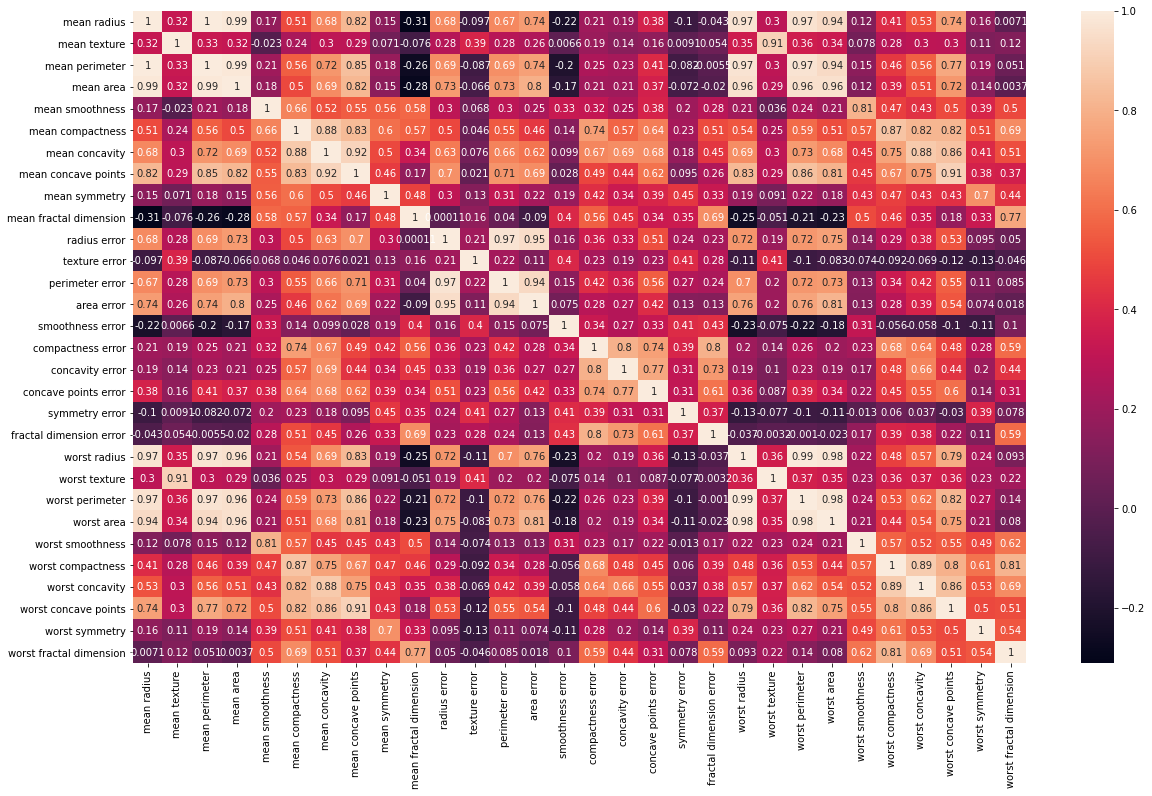

In [4]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print(Y)
#Correlation Matrix
plt.figure(figsize=(20,12))
sns.heatmap(X.corr(), annot=True)

In [5]:
print(X.head())
print("***")


   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]
***


In [19]:
# Splitting the dataset into the Training set and Test set
print( type(X))
print(type(Y))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=41)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [7]:
print(type(X_test))
print(type(X_train))
print(type(y_test))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.43754945, -0.22618656, -0.49924811, ..., -1.6555764 ,
        -0.65040734, -1.13876401],
       [ 0.20229988, -1.09596679,  0.14195171, ...,  0.18074496,
         0.40741658, -0.11160099],
       [ 0.16707882, -0.97714435,  0.18032138, ...,  0.41121649,
         0.48097387,  0.05569321],
       ...,
       [ 1.33230902,  0.21345644,  1.30284741, ...,  0.55802369,
        -0.93763106, -0.55966869],
       [-1.71754163,  0.32039663, -1.63157972, ..., -0.55029178,
         0.78045713,  3.79173544],
       [-0.03837739, -1.46906923, -0.05245462, ..., -0.19179806,
        -1.25462796, -0.65793941]])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier






#Using Logistic Regression Algorithm to the Training Set
models = [LogisticRegression(), 
          KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear'),
          SVC(kernel = 'rbf'),
          GaussianNB(),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
          DecisionTreeClassifier(criterion = 'entropy', ),
          AdaBoostClassifier(n_estimators=100)
          ]

CV = 5 
entries = []
for model in models: 
    counter = 2
    model_name = model.__class__.__name__
    for i in range(len(entries)):
      if (str(model_name) in entries[i]):
       model_name = model_name + "V" + str(counter)
    classifier = model

    clf = classifier.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)
    entries.append((model_name, accuracy*100))
print(len(entries))
entries
      


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


8


[('LogisticRegression', 96.49122807017544),
 ('KNeighborsClassifier', 92.98245614035088),
 ('SVC', 98.24561403508771),
 ('SVCV2', 92.39766081871345),
 ('GaussianNB', 97.6608187134503),
 ('RandomForestClassifier', 98.83040935672514),
 ('DecisionTreeClassifier', 97.07602339181285),
 ('AdaBoostClassifier', 97.6608187134503)]

In [21]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

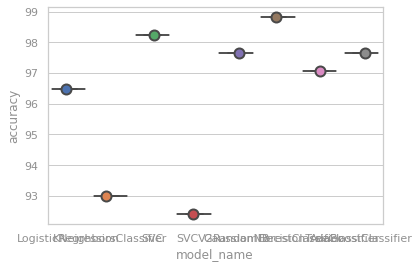

In [22]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'KNeighborsClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'SVCV2'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'AdaBoostClassifier')]

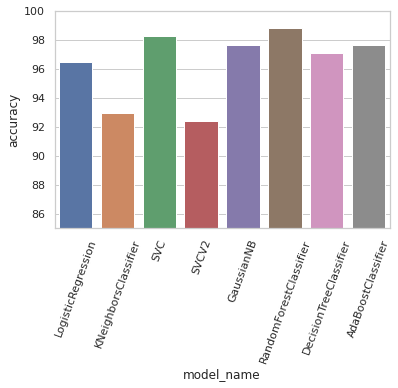

In [23]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ind = np.arange(len(cv_df['model_name']))


ax = sns.barplot(x=cv_df['model_name'], y=cv_df['accuracy'])
ax.set_ylim((85,100))

ax.set_xticks(range(0,len(ind)))

ax.set_xticklabels(list(cv_df['model_name']), rotation=70)


[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'KNeighborsClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'SVCV2'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'AdaBoostClassifier')]

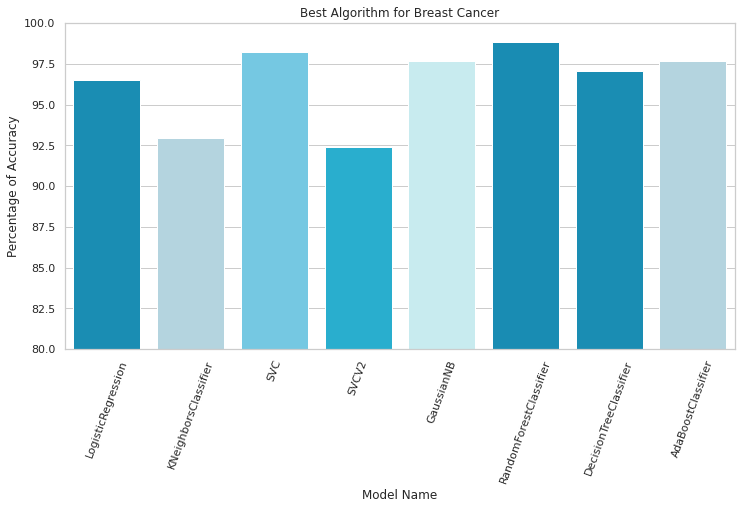

In [24]:
fig, ax = plt.subplots(figsize = (12,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=5
ind = np.arange(len(cv_df['model_name']))
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC']
sns.barplot(x=cv_df['model_name'], y = cv_df['accuracy'],  
            data = df, palette=color_palette_list, 
            label="Percentage of yes responses to question", 
            ax=ax, ci=None)
ax.set_title("Best Algorithm for Breast Cancer")
ax.set_ylabel("Percentage of Accuracy")
ax.set_ylim(80,100)
ax.set_xlabel("Model Name")
ax.set_xticks(range(0,len(ind)))
ax.set_xticklabels(list(cv_df['model_name']), rotation=70)

In [25]:
from sklearn.metrics import accuracy_score


Implementing Genetic Algorithm to the best model to get the best version of this model and the best accuracy over every generation


In [26]:

#defining various steps required for the genetic algorithm
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [77]:
#training a logistics regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Accuracy = "+ str(accuracy_score(y_test,predictions)))

Accuracy = 0.9649122807017544


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:

chromo,score=generations(size=250,n_feat=30,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
logmodel.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = logmodel.predict(X_test.iloc[:,chromo[-1]])

In [29]:
print("Accuracy = "+ str(accuracy_score(y_test,predictions)))

Accuracy = 0.9766081871345029


In [ ]:
#Accuracy = 0.9649122807017544


In [30]:
import sklearn.metrics as sk_metrics
import seaborn as sns
from sklearn.metrics import classification_report

target_names = ['Negative','Positive']

print(classification_report(y_test,predictions.round(),target_names=target_names))
matrix = confusion_matrix(predictions.round(), y_test,)

print(matrix)

              precision    recall  f1-score   support

    Negative       0.97      0.97      0.97        61
    Positive       0.98      0.98      0.98       110

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

[[ 59   2]
 [  2 108]]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


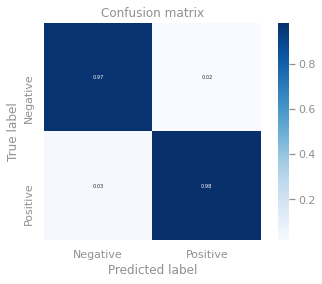

In [31]:
def show_confusion_matrix(test_labels, predictions):
  """Compute confusion matrix and normalize."""
  confusion = sk_metrics.confusion_matrix(
    test_labels, predictions)
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = target_names
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

show_confusion_matrix(y_test, predictions.round())

In [32]:
XX = np.array([0.1, 0.34, 0.2, 0.98])
yy = np.array(["A", "B", "A", "C"])

yy_pred = np.array(["A", "C", "B", "C"])

df = pd.DataFrame(XX, columns=["XX"])
df["actual"] = yy
df["predicted"] = yy_pred

incorrect = df[df["actual"] != df["predicted"]]

In [33]:
incorrect

,XX,actual,predicted
1,0.34,B,C
2,0.20,A,B


In [53]:


print(type(predictions))
print(type(y_test))

print(len(predictions))
print(len(y_test))

df = pd.DataFrame(X_test["mean radius"], columns=["X_test"])
df["actual"] = y_test
df["predicted"] = predictions

incorrect = df[df["actual"] != df["predicted"]]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
171
171


In [49]:
incorrect

,X_test,actual,predicted
20,NaN,0,1
100,NaN,0,1
158,NaN,1,0
163,NaN,1,0


In [108]:
badPred = [i for i in range(len(y_test)) if y_test[i] != predictions[i]]
print(badPred)
goodPred = [i for i in range(len(y_test)) if y_test[i] == predictions[i]]
print(goodPred)


[20, 100, 105, 158, 163, 166]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 164, 165, 167, 168, 169, 170]


In [106]:
#wrong predictions
for i in badPred:
  print(X_test['mean radius'].iloc[i])

15.85
14.86
11.42
14.34
14.22
11.08


In [110]:
#good predictions
counter = 0 
for i in goodPred:
  counter +=1
  if counter <5:  
    print(X_test['mean radius'].iloc[i])

12.58
14.76
14.64
12.65


   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]


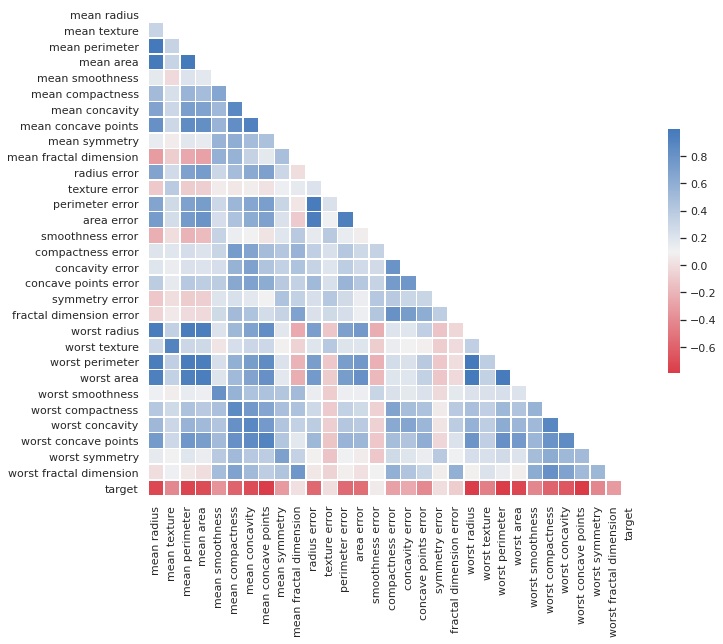

In [118]:
data = pd.read_csv('/content/drive/MyDrive/BreastCancer/breastCancerData.csv')

print(data.head())
# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

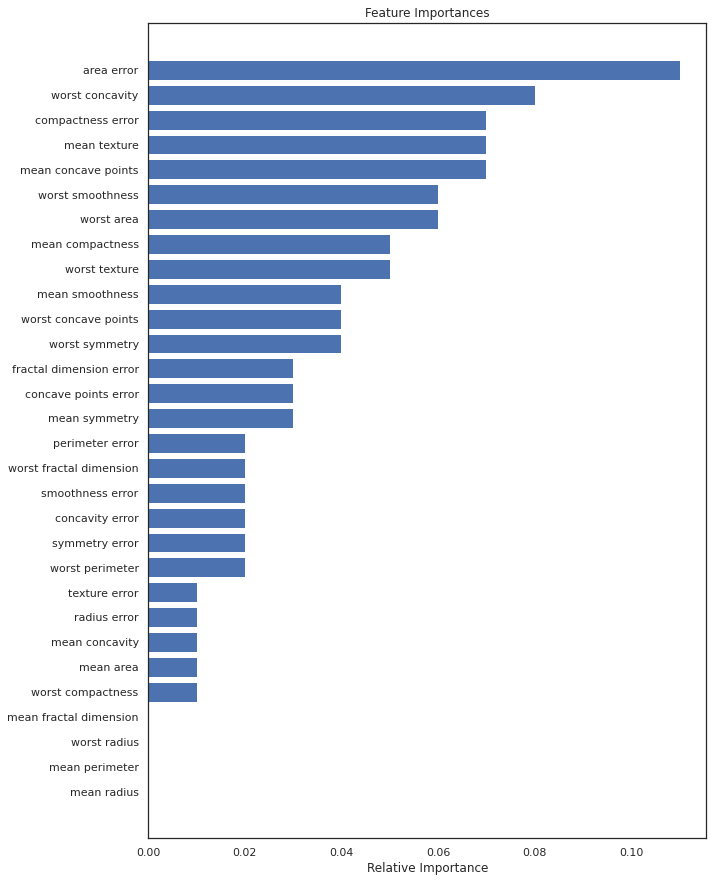

In [119]:
# plotting feature importances
features = data.drop('target', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()